In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# sklearn
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
# Import the data
df = pd.read_csv("C:/Users/z011348/Desktop/ML/input/car data/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [38]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

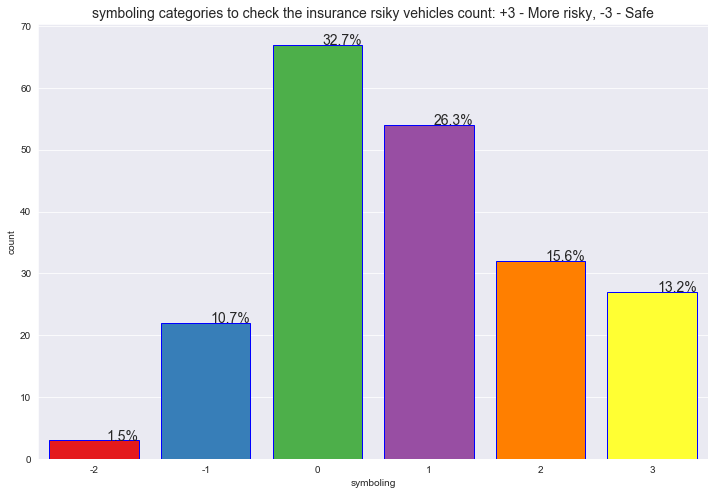

In [163]:
# symboling categories to check the insurance rsiky vehicles count :
# Its assigned insurance risk rating, 
# A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		
sns.set_style("darkgrid")
#1. diaplay the survived info 
plt.figure(figsize=(12,8))
s = sns.countplot(x='symboling', 
                  data=df, 
                  palette='Set1',
                  saturation=1,
                  edgecolor=(0,0,1))
plt.title("symboling categories to check the insurance rsiky vehicles count: +3 - More risky, -3 - Safe", size=14)
#2. Rotate x-labels
plt.xticks(rotation=0)

# Display value percentage 
total = float(len(df))

for p in s.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    s.annotate(percentage, (x, y), ha='right', size=14)
plt.show()

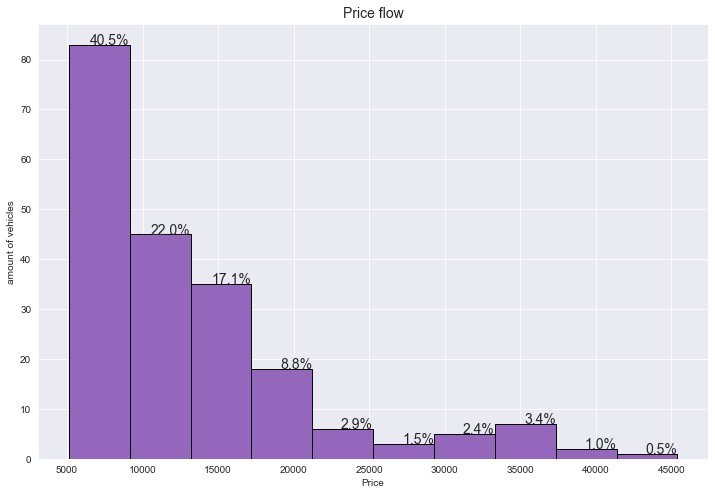

In [162]:
# Check the car prices flow (price trend) - histogram
plt.figure(figsize=(12,8))
s= df.price.hist(color='C4',
                 edgecolor=(0,0,0))
plt.xlabel("Price")
plt.ylabel("amount of vehicles")
plt.title("Price flow", size=14)
total = float(len(df))

# Display value percentage 
for p in s.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    s.annotate(percentage, (x, y), ha='right', size=14)
plt.show()

In [58]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

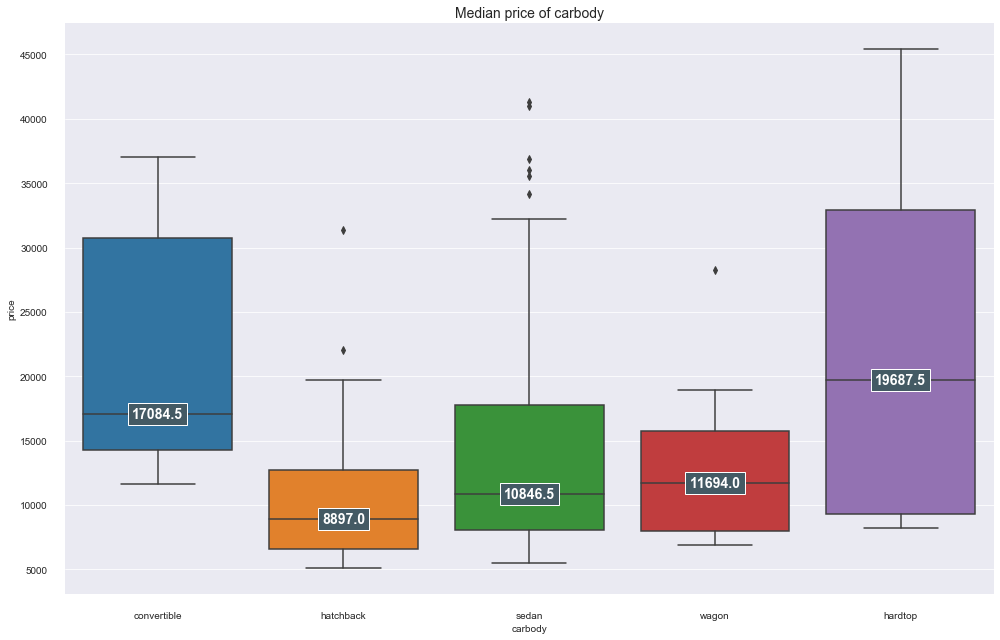

In [60]:
# Find out the average price of carbody - using boxplot
plt.figure(figsize=(14,9))
sns.set_style("darkgrid")
box_plot = sns.boxplot(x="carbody", 
                       y="price", 
                       data=df)
sns.despine(offset=10, trim=True)

# Diaplay mean data labels in boxplot
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
ax.set_title("Median price of carbody", size="14")

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=14,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

In [6]:
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [10]:
df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

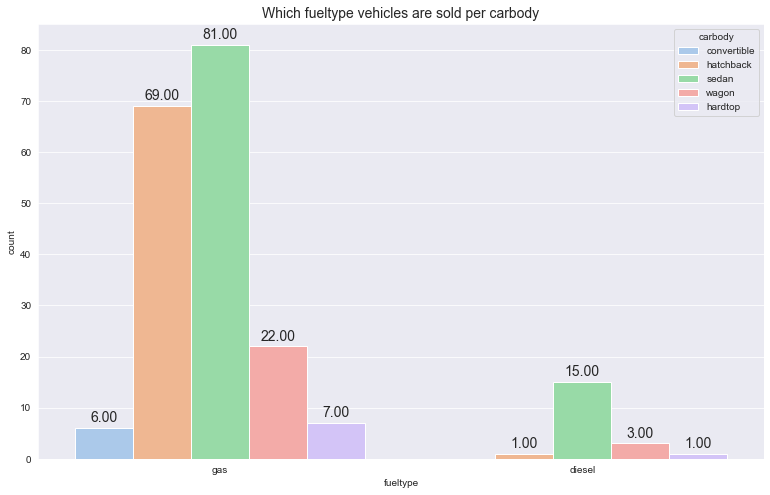

In [164]:
# Which fueltype vehicles are sold per carbody
plt.figure(figsize=(13,8))
sns.set_style("darkgrid")
s = sns.countplot(x="fueltype", hue='carbody', data=df, palette='pastel')
plt.title("Which fueltype vehicles are sold per carbody", size=14)
for p in s.patches:
    s.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', 
               va = 'center', 
               xytext = (0, 10), 
               textcoords = 'offset points',
              size=14)

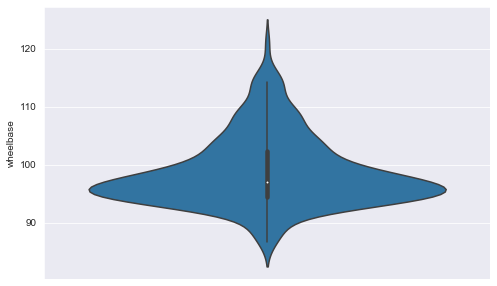

In [29]:
# wheelbase 
plt.figure(figsize=(8,5))
sns.violinplot(y=df["wheelbase"]);

In [28]:
#plt.figure(figsize=(13,8))
#sns.set_style("darkgrid")
#sns.violinplot( x=df["carbody"], y=df["wheelbase"], linewidth=5)
#sns.plt.show()

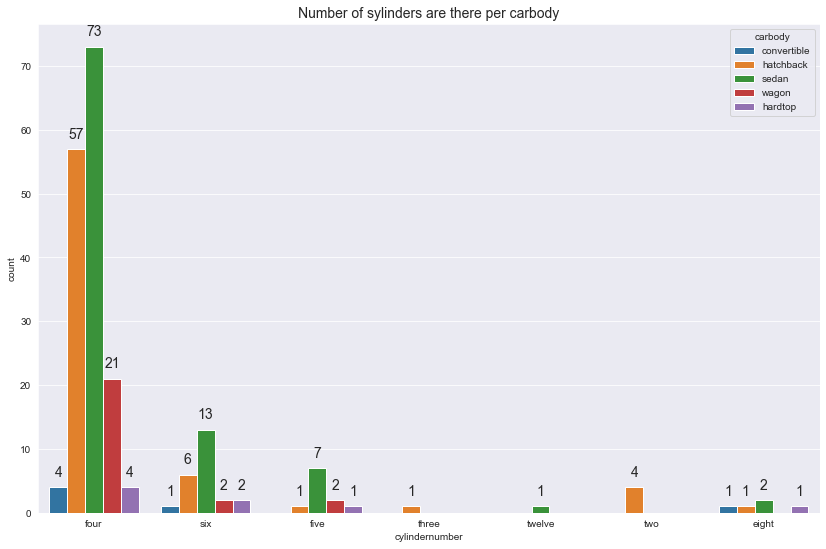

In [165]:
# number of sylinders are there per carbody
plt.figure(figsize=(14,9))
sns.set_style("darkgrid")
s = sns.countplot(x="cylindernumber", hue='carbody', data=df, palette='tab10')
plt.title("Number of sylinders are there per carbody", size=14)

for p in s.patches:
    s.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', 
               va = 'center', 
               xytext = (0, 15), 
               textcoords = 'offset points',
              size=14)

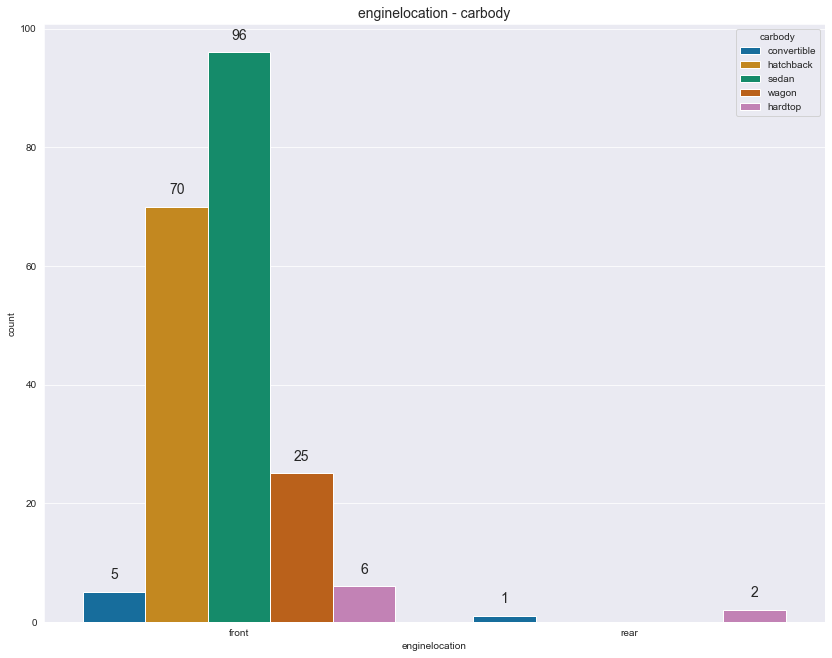

In [166]:
# enginelocation - carbodywise 
plt.figure(figsize=(14,11))
sns.set_style("darkgrid")
s = sns.countplot(x="enginelocation", hue='carbody', data=df, palette='colorblind')
plt.title("enginelocation - carbody", size=14)

for p in s.patches:
    s.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', 
               va = 'center', 
               xytext = (0, 17), 
               textcoords = 'offset points', size=14)

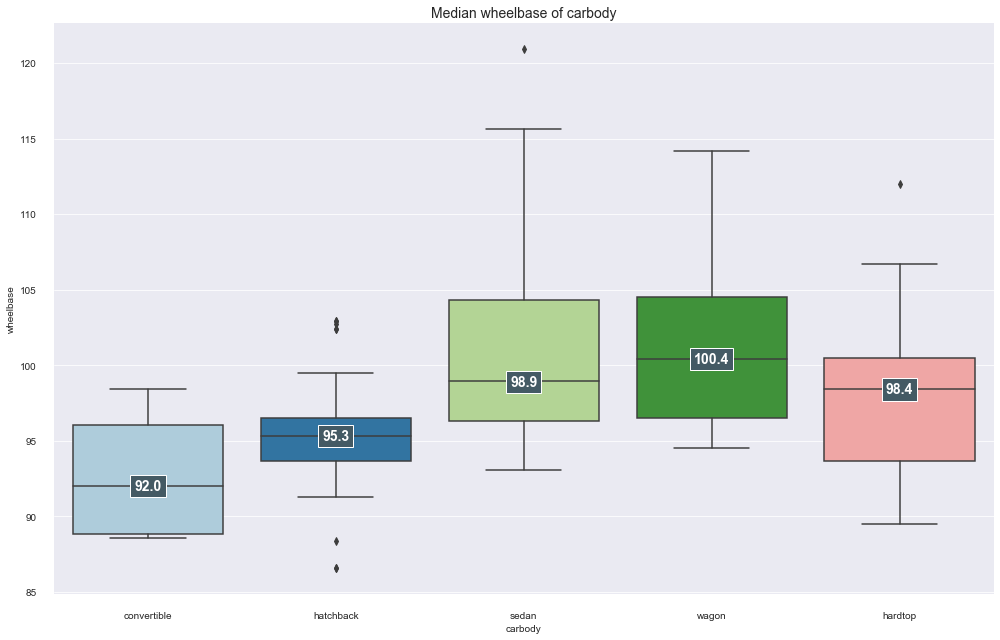

In [59]:
# Find out the average wheelbase of carbody - using boxplot
plt.figure(figsize=(14,9))
sns.set_style("darkgrid")
box_plot = sns.boxplot(x="carbody", 
                    y="wheelbase", 
                    data=df, 
                    palette="Paired")
sns.despine(offset=10, trim=True)

# Diaplay mean data labels in boxplot
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
ax.set_title("Median wheelbase of carbody", size="14")

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=14,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

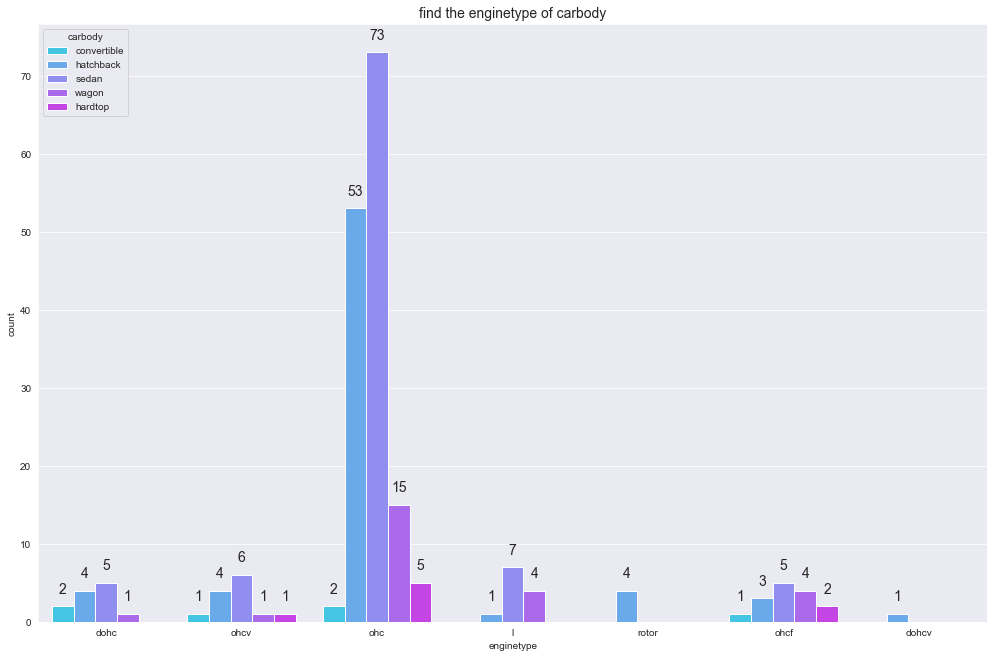

In [167]:
# enginetype vs carbodywise 
plt.figure(figsize=(17,11))
sns.set_style("darkgrid")
s = sns.countplot(x="enginetype", hue='carbody', data=df, palette='cool')
plt.title("find the enginetype of carbody", size=14)

for p in s.patches:
    s.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', 
               va = 'center', 
               xytext = (0, 17), 
               textcoords = 'offset points', size=14)

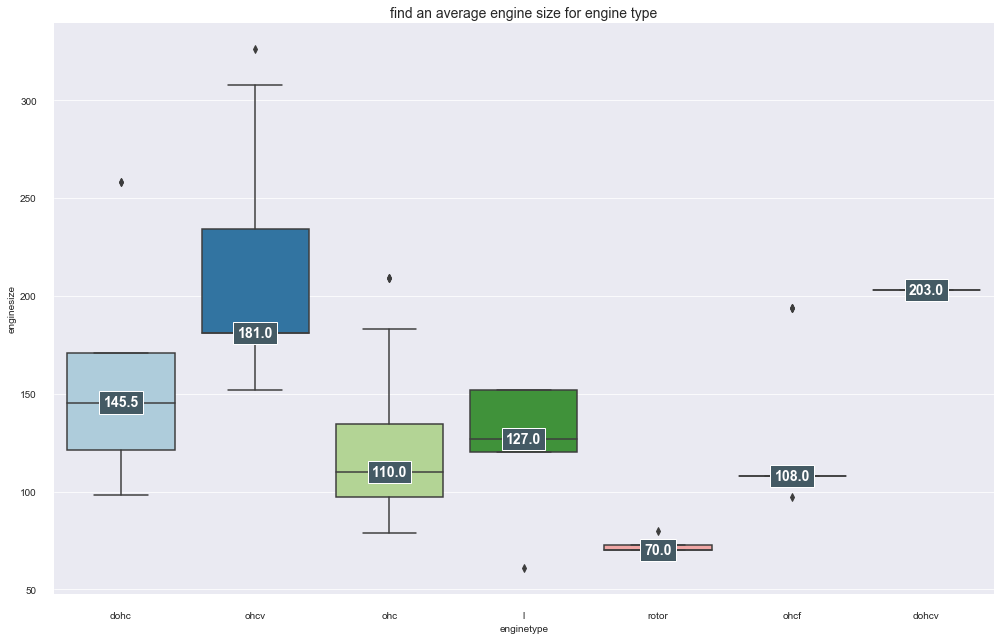

In [99]:
# find an average engine size for engine type
plt.figure(figsize=(14,9))
sns.set_style("darkgrid")
box_plot = sns.boxplot(x="enginetype", 
                    y="enginesize", 
                    data=df, 
                    palette="Paired")
sns.despine(offset=10, trim=True)

# Diaplay mean data labels in boxplot
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
ax.set_title("find an average engine size for engine type", size="14")

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=14,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

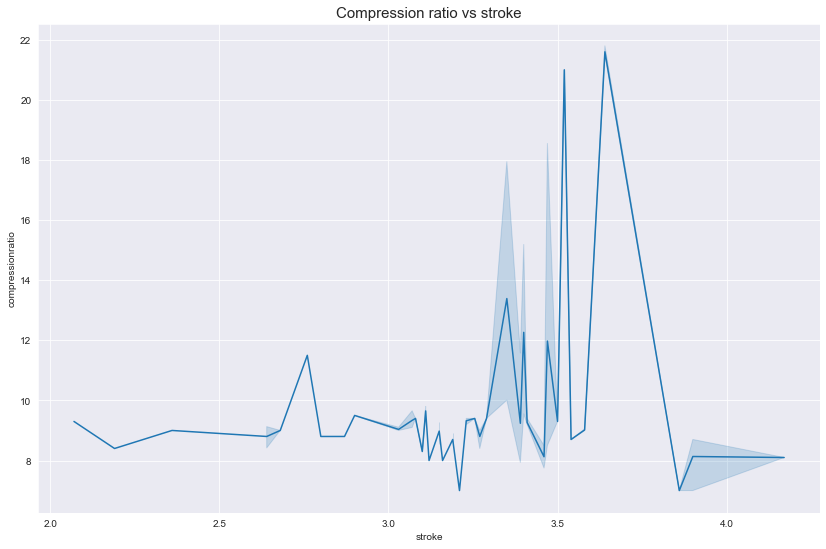

In [109]:
plt.figure(figsize=(14,9))
plt.title("Compression ratio vs stroke", size=15)
sns.lineplot(x="stroke", y="compressionratio", data=df)

In [146]:
df_tmp = df.groupby(by=["carbody"]).mean()
df_tmp.sort_values(by='price', ascending=False, inplace=True)
df_tmp.reset_index(inplace=True)
df_tmp

,carbody,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,hardtop,125.875000,1.875000,98.500000,176.937500,66.612500,52.850000,2810.625000,176.250000,3.608750,3.322500,10.725000,142.250000,5031.250000,21.625000,27.250000,22208.500000
1,convertible,94.666667,2.833333,92.700000,170.383333,65.583333,51.433333,2801.666667,157.166667,3.491667,3.043333,8.933333,131.666667,5158.333333,20.500000,26.000000,21890.500000
2,sedan,102.072917,0.333333,100.619792,177.585417,66.260417,54.337500,2610.593750,130.822917,3.338542,3.267292,10.937500,103.104167,5081.770833,25.322917,30.833333,14344.270833
3,wagon,126.880000,-0.160000,102.156000,181.304000,66.256000,56.728000,2784.240000,123.840000,3.406400,3.175600,10.316000,97.440000,5018.000000,24.040000,28.720000,12371.960000
4,hatchback,93.842857,1.585714,95.535714,166.592857,65.247143,52.108571,2348.185714,114.400000,3.244571,3.278143,9.027429,101.171429,5230.714286,26.314286,32.171429,10376.652386


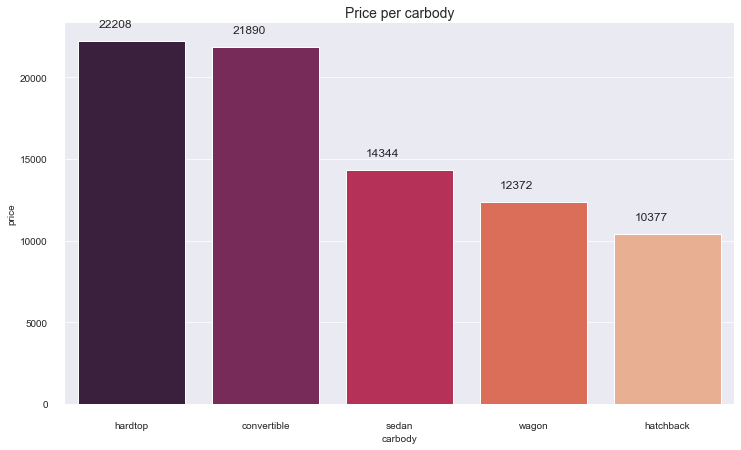

In [168]:
# mean on cardbody
df_tmp = df.groupby(by=["carbody"]).mean()
df_tmp.sort_values(by='price', ascending=False, inplace=True)
df_tmp.reset_index(inplace=True)

# Price per carbody
plt.figure(figsize=(12,7))
sns.set_style("darkgrid")
s = sns.barplot(x="carbody", 
                    y="price", 
                    data=df_tmp, 
                    palette="rocket")
sns.despine(offset=10, trim=True)

plt.title("Price per carbody", size=14)

for p in s.patches:
    s.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'right', 
               va = 'center', 
               xytext = (0, 17), 
               textcoords = 'offset points',
              size=12)
    